 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 04 : Neural Networks </b>


This programming assignment gives you a chance to perform the classification task using neural networks. You will get to build a neural network from scratch and train and test it on a standard classification dataset. Further you will learn different tricks and techniques to train a neural network eficiently by observing few important issues and trying to overcome them. This includes observing the performance of the network for different activation functions and optimization algorithms. We will conclude with implementation of various regularization techniques to overcome the problems of overfitting and vanishing gradients.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<b>  Part - (1) : Develop a neural network based classification network from scratch: </b>  This programming assignment uses MNIST digit dataset. It consists of large collection of handwritten digits from 0 to 9. These images are formated as 28x28 pixel gray scale images. The objective of this programming assignment is to design a neural network architecture that takes input as 28x28 image (or 784 dimensional vector) as input and predicts the digit information in it. Although there are diffrent varieties of neural network architecture to solve this task, this programming assignment uses only the feed forward network.  

<dt> <h6> 1. Load MNIST data and create train, test splits </dt> </h6>

<dd> <h6> - The MNIST dataset consists of around 70,000 images. Divide the dataset into two segments: training and testing. Allocate 60,000 images for training and 10,000 images for testing
</dd> </h6>
<dd> <h6> - Code for downloading the data and creating train-test splits is provided </dd> </h6>

<dt> <h6> 2. Design a simple classification network </dt> </h6>

<dd> <h6> - Let us use three layer feed-forward neral network. Use 512 nodes in the hidden layers and 10 nodes in the output layer. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dd> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dd> </h6>
<dd> <h6> where $\textbf{W}_{1} \in \mathcal{R}^{512 \times 768}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{10 \times 512} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dd> </h6>
<dd> <h6> - Consider g(.) as ReLU activation function. Softmax activation function should be used at the last layer h(.), to get the posterior probability of the classes. </dd> </h6>

<dt> <h6> - Training classification network: </dt> </h6>

<dd> <h6>  - Flatten the 28x28 images to arrive at 784 dimensional vector.  </dd> </h6>  
<dd> <h6> - Randomly initialize the parameters of network, $\textbf{W}_{1} \in \mathcal{R}^{768 \times 512}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{512 \times 10}$  </dd> </h6>
<dd> <h6> - Feedforward the batch of input vectors to get the posterior probability of classes.  </dd> </h6>
<dd> <h6> - Compute the loss between the estimated posterior probabilities and the true targets. </dd> </h6>  
<dd> <h6> - Update the parameters of network to minimize the loss function.  </dd> </h6>
<dd> <h6> <dd> <h6> - Backpropagate the loss function to get the gradients.  </dd> </h6> </dd> </h6>  

<dd> <h6> <dd> <h6> - You can use stochastic gradient descent (SGD) optimization algorithm to update the parameters.  </dd> </h6> </dd> </h6>  
<dd> <h6> <dd> <h6> - Cleverly set the hyperparameters involved in this optimization process. </dd> </h6> </dd> </h6>

<dt> <h6> 3. Evaluate the performance of classification network </dd> </h6>
<dd> <h6> - feed-forward the MNIST data through the trained classification network to get class posteriors. </dd> </h6>  
<dd> <h6> - Assign the input to the class having maximum posterior probability </dd> </h6>  
<dd> <h6> - Compute the loss and accuaracy </dd> </h6>  
<dd> <h6> - Report your observations </dd> </h6>  





In [182]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

In [184]:
##################################################
#Load MNIST data.
##################################################
import torchvision.datasets as datasets
from sklearn import preprocessing
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
mnist_traindata = mnist_traindata.reshape((60000, 784))
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testdata = mnist_testdata.reshape((10000, 784))
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)

mnist_traindata = mnist_traindata / 256

Training data (60000, 784)
Training labels (60000,)
Testing data (10000, 784)
Testing labels (10000,)


Epoch 1 Training Accuracy =  73.10833333333333 %
Epoch 1 Validation Accuracy =  74.93333333333332 %
Epoch 2 Training Accuracy =  79.61458333333333 %
Epoch 2 Validation Accuracy =  80.76666666666667 %
Epoch 3 Training Accuracy =  82.425 %
Epoch 3 Validation Accuracy =  83.15833333333333 %
Epoch 4 Training Accuracy =  84.06666666666666 %
Epoch 4 Validation Accuracy =  84.83333333333334 %
Epoch 5 Training Accuracy =  85.22916666666667 %
Epoch 5 Validation Accuracy =  85.875 %
Epoch 6 Training Accuracy =  86.12708333333333 %
Epoch 6 Validation Accuracy =  86.61666666666666 %
Epoch 7 Training Accuracy =  86.76041666666666 %
Epoch 7 Validation Accuracy =  87.375 %
Epoch 8 Training Accuracy =  87.36874999999999 %
Epoch 8 Validation Accuracy =  88.09166666666667 %
Epoch 9 Training Accuracy =  87.87291666666667 %
Epoch 9 Validation Accuracy =  88.40833333333333 %
Epoch 10 Training Accuracy =  88.39791666666666 %
Epoch 10 Validation Accuracy =  88.85 %
Epoch 11 Training Accuracy =  88.675 %
Epoc

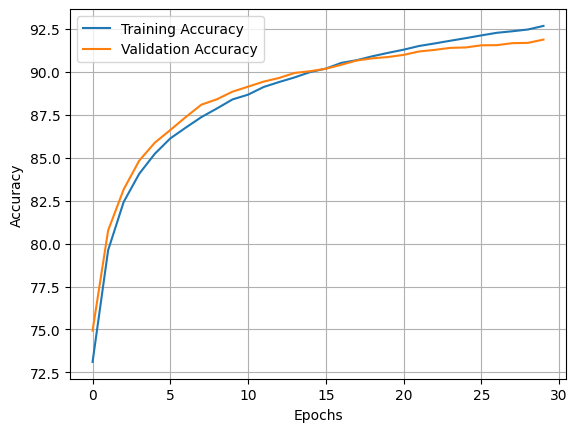

In [189]:
##################################################
#Define the architecture
##################################################

#Complete the below function to impliment ReLU activation function
def ReLu(inp):
  outp = np.where(inp < 0, 0, inp) #works for matrices
  return outp

#Complete the below function to impliment gradient of ReLU activation function
def gradReLu(inp):
  outp = np.where(inp < 0, 0, 1) #works for matrices
  return outp

#Complete the below function to impliment softmax activation function
def softmax(inp):
  #Returns a vector
  outp = np.exp(inp)
  outp = outp/outp.sum(axis=1)[:,None]
  return outp

def fwdPropagate(inputs, weights, biases):
  #Inputs: input data, paramters of network
  W1, W2, W3 = weights
  b1, b2, b3 = biases
  a0 = inputs
  a1 = a0 @ W1 + b1
  a2 = ReLu(a1) @ W2 + b2
  a3 = ReLu(a2) @ W3 + b3
  y_out = sigmoid(a3)
  #Return the requires outputs, i.e., final output and intermediate activations
  outps = [a0, a1, a2, y_out]
  return outps

#Complete the below function to compute the gradients
def computeGradients(inputs, targets, weights, activations, biases):
  #Inputs: input data, targets, parameters of netwrok, intermediate activations
  a0, a1, a2, y_out = activations
  W1, W2, W3 = weights
  b1, b2, b3 = biases

  dj_dw1 = np.zeros(W1.shape)
  dj_dw2 = np.zeros(W2.shape)
  dj_dw3 = np.zeros(W3.shape)

  delta1 = np.zeros(a1.shape)
  delta2 = np.zeros(a1.shape)
  delta3 = np.zeros(a2.shape)

  #Compute the loss
  delta3 = y_out - targets
  delta2 = delta3 @ W3.T
  delta2 *= gradReLu(a2)

  delta1 = delta2 @ W2.T
  delta1 *= gradReLu(a1)
  #Compote the derivative of loss at parameters

  z1 = ReLu(a1)
  z2 = ReLu(a2)

  dj_db3 = np.sum(delta3) / a0.shape[0]
  dj_db2 = np.sum(delta2) / a0.shape[0]
  dj_db1 = np.sum(delta1) / a0.shape[0]

  dj_dw1 = a0.T@delta1 / a0.shape[0]
  dj_dw2 = z1.T@delta2 / a0.shape[0]
  dj_dw3 = z2.T@delta3 / a0.shape[0]
  #Return the gradients

  return [dj_dw1, dj_dw2, dj_dw3, dj_db1, dj_db2, dj_db3]

#Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate, biases):
  #Inputs: weights, gradients, and learning rate
  W1, W2, W3 = weights
  b1, b2, b3 = biases
  dj_dw1, dj_dw2, dj_dw3, db1, db2, db3= gradients
  W1 = W1 - learning_rate * dj_dw1
  W2 = W2 - learning_rate * dj_dw2
  W3 = W3 - learning_rate * dj_dw3
  b1 = b1 - learning_rate * db1
  b2 = b2 - learning_rate * db2
  b3 = b3 - learning_rate * db3
  #Return the updated parameters
  return [W1, W2, W3], [b1, b2, b3]

#Complete the below function to complete the backpropagation ste
def backPropagate(inputs, targets, weights, activations, learning_rate, biases):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm
  #Compute the gradients
  gradients = computeGradients(inputs, targets, weights, activations, biases)
  #Update the paramters using gradients
  weights, biases = applyGradients(weights, gradients, learning_rate, biases)
  #Return the updated parameters
  return weights, biases

def onehot(train, n_classes):
  Y = np.zeros((train.shape[0], n_classes))
  Y[np.arange(Y.shape[0]), train] = 1
  return Y

##################################################
#Train the network
##################################################
def getpreds(y_out):
  return np.argmax(y_out, 1)

#Complete the below function to complete the training of network
def training(inputs, targets_idx, batch_size = 128, epochs = 30, train_val_split=0.8, learning_rate=0.001):

  #Set the hyperparameters
  hidden_units = 512
  n_classes = 10

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data
  targ_labels = np.copy(targets_idx)

  targets_idx = onehot(targets_idx, n_classes)
  dataset = inputs
  dataset_targs = targets_idx
  size = int(inputs.shape[0] * train_val_split)

  inputs = dataset[:size, :]
  inputs_targts_idx = dataset_targs[:size, :]
  inputs_labels = targ_labels[:size]
  valid_labels = targ_labels[size:]
  targets_idx = dataset_targs[:size, :]
  valid_inputs = dataset[size:, :]
  valid_targts_idx = dataset_targs[size:, :]

  n_samples = inputs.shape[0]
  n_batches = int(n_samples / batch_size)

  #Randomly initialize the weights
  W1 = np.random.rand(dataset.shape[1], hidden_units) - 0.5
  W2 = np.random.rand(hidden_units, hidden_units) - 0.5
  W3 = np.random.rand(hidden_units, n_classes) - 0.5
  #Interate for epochs times
  biases = np.random.rand(3)
  weights = [W1, W2, W3]
  tr_acc = []
  valid_acc = []
  for epoch in range(epochs):
    #Shuffle the training data
    shuffle_ind = np.random.permutation(inputs.shape[0])
    input_shuff = inputs[shuffle_ind, :]
    targets_idx_shuff= inputs_targts_idx[shuffle_ind]
    #Iterate through the batches of data
    for batch in range(n_batches):
      # print(epoch + 1, batch + 1)
      low = batch * batch_size
      hi = min((batch + 1) * batch_size, inputs.shape[0])
      #Forward propagation
      batch_input = input_shuff[low:hi, :]
      batch_targets = targets_idx_shuff[low:hi]
      activations = fwdPropagate(batch_input, weights, biases)
      #Backward propagation
      weights, biases = backPropagate(batch_input, batch_targets, weights, activations, learning_rate, biases)
    #Compute outpus on trianing data
    _ = fwdPropagate(inputs, weights, biases)
    y_out = _[3]

    #Compute training accuracy, and training error
    tr_acc.append(np.sum(getpreds(y_out) == inputs_labels) / inputs_labels.shape[0] * 100)
    #Compute outputs on validation data
    _ = fwdPropagate(valid_inputs, weights, biases)
    y_out = _[3]

    #Compute validation accuracy, and validation error
    valid_acc.append(np.sum(getpreds(y_out) == valid_labels) / valid_labels.shape[0] * 100)
    #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
    print('Epoch', epoch + 1, 'Training Accuracy = ', tr_acc[-1], '%')
    print('Epoch', epoch + 1, 'Validation Accuracy = ', valid_acc[-1], '%')

    #Save the parameters of network
  plt.plot(np.arange(epochs), tr_acc, label = 'Training Accuracy')
  plt.plot(np.arange(epochs), valid_acc, label = 'Validation Accuracy')
  plt.grid()
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  return weights, biases

#Call the training function to train the network
W, B = training(mnist_traindata, mnist_trainlabel)

##################################################
#Evaluate the performance on test data
##################################################
bru = mnist_testdata[:, :]
bru = bru / 256
_ = fwdPropagate(bru, W, B)
y_out = _[3]
print("Test accuracy = ", np.sum(getpreds(y_out) == mnist_testlabel)/y_out.shape[0] * 100, '%')

<b> Report your observations </b>

1. We can see the accuracy rising with the epochs.

2. By epoch 30, our model gets $92.67$% accuracy.

3. Model runs pretty fast. We can get higher accuracy by normalising the data better(instead of dividing by $256$), however this takes longer since the model needs to perform calculations with more precisions.



<b> Part - (2) : Understanding activation functions: </b> In this part you will learn to use different activation functions for the classification task and compare their performances.

<dt> <h6> 1. Train MNIST digit classification network with different activation functions i.e. Sigmoid, Tanh, ReLU, LeakyReLU etc. You can stick to stochastic gradient descent optimization algorithm for this part </dt> </h6>
<dt> <h6> 2. Report the accuray on MNIST test data for all the experiments. Write down your observations in the report.</br> </dt> </h6>



Sigmoid training performance : 

Epoch 1 Training Accuracy =  20.670833333333334 %
Epoch 1 Validation Accuracy =  21.766666666666666 %
Epoch 2 Training Accuracy =  32.59583333333333 %
Epoch 2 Validation Accuracy =  33.84166666666666 %
Epoch 3 Training Accuracy =  42.52291666666667 %
Epoch 3 Validation Accuracy =  44.6 %
Epoch 4 Training Accuracy =  50.208333333333336 %
Epoch 4 Validation Accuracy =  52.15833333333333 %
Epoch 5 Training Accuracy =  55.84166666666667 %
Epoch 5 Validation Accuracy =  58.06666666666666 %
Epoch 6 Training Accuracy =  60.16666666666667 %
Epoch 6 Validation Accuracy =  62.25833333333334 %
Epoch 7 Training Accuracy =  63.31875 %
Epoch 7 Validation Accuracy =  65.375 %
Epoch 8 Training Accuracy =  65.94375 %
Epoch 8 Validation Accuracy =  68.15833333333333 %
Epoch 9 Training Accuracy =  68.09583333333333 %
Epoch 9 Validation Accuracy =  70.14166666666667 %
Epoch 10 Training Accuracy =  69.90833333333333 %
Epoch 10 Validation Accuracy =  71.68333333333334 %


Le

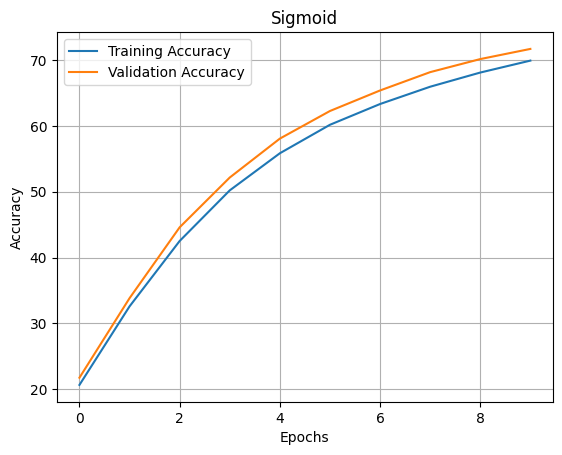

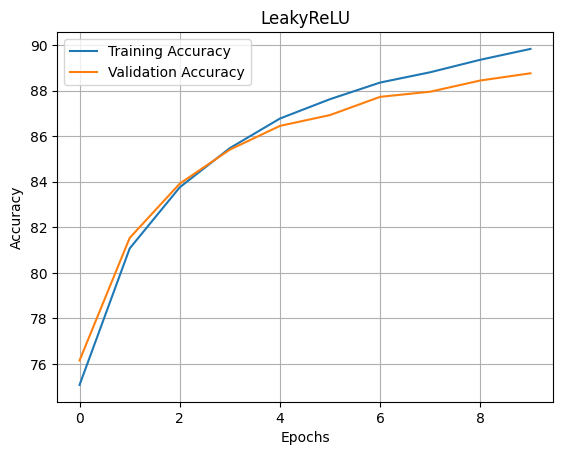

In [193]:
##################################################
#Train the network with different activation functions
##################################################
def Sigmoid(inp):
  outp = 1/(1 + np.exp(-inp)) #works for matrices
  return outp

#Complete the below function to impliment gradient of ReLU activation function
def gradSigmoid(inp):
  sigm = Sigmoid(inp)
  outp = sigm * (1 - sigm)
  return outp

def LeakyReLu(inp):
  outp = np.where(inp < 0, 0.01 * inp, inp) #works for matrices
  return outp

#Complete the below function to impliment gradient of ReLU activation function
def gradLeakyReLu(inp):
  outp = np.where(inp < 0, 0.01, 1) #works for matrices
  return outp



##################################################
#Evaluate the performance on MNIST test data
##################################################
##################################################
#Define the architecture
##################################################

#Complete the below function to impliment softmax activation function
def softmax(inp):
  #Returns a vector
  # print(inp)
  outp = np.exp(inp)
  # sum = np.sum(outp)
  # outp /= np.sum
  # Now with matrix support lol
  outp = outp/outp.sum(axis=1)[:,None]
  return outp

#Complete the below function to impliment forward propagation of data
def fwdPropagate(inputs, weights, hidden_func, hidden_func_grad):
  #Inputs: input data, paramters of network
  W1, W2, W3 = weights
  # print(W1, W2, W3)
  a0 = inputs
  a1 = a0 @ W1
  a2 = hidden_func(a1) @ W2
  a3 = hidden_func(a2) @ W3
  y_out = softmax(a3)
  # print(a3)
  # print(y_out)
  # #Return the requires outputs, i.e., final output and intermediate activations
  outps = [a0, a1, a2, y_out]
  return outps

def onehot(train, n_classes):
  Y = np.zeros((train.shape[0], n_classes))
  Y[np.arange(Y.shape[0]), train] = 1
  return Y
#Complete the below function to compute the gradients
def computeGradients(inputs, targets, weights, activations, hidden_func, hidden_func_grad):
  #Inputs: input data, targets, parameters of netwrok, intermediate activations
  a0, a1, a2, y_out = activations
  # delta1, delta2, delta3 = deltas
  W1, W2, W3 = weights
  dj_dw1 = np.zeros(W1.shape)
  dj_dw2 = np.zeros(W2.shape)
  dj_dw3 = np.zeros(W3.shape)

  #need to find deltas here
  delta1 = np.zeros(a1.shape)
  delta2 = np.zeros(a1.shape)
  delta3 = np.zeros(a2.shape)

  #Compute the loss
  delta3 = y_out - targets
  for n in range(delta2.shape[0]):
    delta2[n] = W3 @ delta3[n, :]
    delta2[n] *= hidden_func_grad(a2[n])
  for n in range(delta1.shape[0]):
    delta1[n] = W2 @ delta2[n, :]
    delta1[n] *= hidden_func_grad(a1[n])
  #Compote the derivative of loss at parameters
  z1 = hidden_func(a1)
  z2 = hidden_func(a2)

  dj_dw1 = a0.T@delta1 / a0.shape[0]
  dj_dw2 = z1.T@delta2 / a0.shape[0]
  dj_dw3 = z2.T@delta3 / a0.shape[0]
  #Return the gradients

  return [dj_dw1, dj_dw2, dj_dw3]

#Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate):
  #Inputs: weights, gradients, and learning rate
  W1, W2, W3 = weights
  dj_dw1, dj_dw2, dj_dw3 = gradients
  W1 = W1 - learning_rate * dj_dw1
  W2 = W2 - learning_rate * dj_dw2
  W3 = W3 - learning_rate * dj_dw3
  #Return the updated parameters
  return [W1, W2, W3]

#Complete the below function to complete the backpropagation ste
def backPropagate(inputs, targets, weights, activations, learning_rate, hidden_func, hidden_func_grad):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm
  #Compute the gradients
  gradients = computeGradients(inputs, targets, weights, activations, hidden_func, hidden_func_grad)

  #Update the paramters using gradients
  weights = applyGradients(weights, gradients, learning_rate)
  #Return the updated parameters
  return weights


##################################################
#Train the network
##################################################
def getpreds(y_out):
  return np.argmax(y_out, 1)

#Complete the below function to complete the training of network
def training(inputs, targets_idx, hidden_func, hidden_func_grad, name, batch_size = 128, epochs = 10, train_val_split=0.8, learning_rate=0.001):

  #Set the hyperparameters
  hidden_units = 512
  n_classes = 10

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data
  targ_labels = np.copy(targets_idx)

  targets_idx = onehot(targets_idx, n_classes)
  dataset = inputs
  dataset_targs = targets_idx
  size = int(inputs.shape[0] * train_val_split)

  inputs = dataset[:size, :]
  inputs_labels = targ_labels[:size]
  valid_labels = targ_labels[size:]
  targets_idx = dataset_targs[:size, :]
  valid_inputs = dataset[size:, :]
  valid_targts_idx = dataset_targs[size:, :]


  n_samples = inputs.shape[0]
  n_batches = int(n_samples / batch_size)

  #Randomly initialize the weights
  W1 = np.random.rand(inputs.shape[1], hidden_units) - 0.5
  W2 = np.random.rand(hidden_units, hidden_units) - 0.5
  W3 = np.random.rand(hidden_units, n_classes) - 0.5
  #Interate for epochs times

  weights = [W1, W2, W3]
  tr_acc = []
  valid_acc = []
  for epoch in range(epochs):
    #Shuffle the training data
    shuffle_ind = np.random.permutation(inputs.shape[0])
    input_shuff = inputs[shuffle_ind, :]

    targets_idx_shuff= targets_idx[shuffle_ind]
    #Iterate through the batches of data
    for batch in range(n_batches):
      low = batch * batch_size
      hi = min((batch + 1) * batch_size, inputs.shape[0])
      #Forward propagation
      batch_input = input_shuff[low:hi, :]
      batch_targets = targets_idx_shuff[low:hi]
      activations = fwdPropagate(batch_input, weights, hidden_func, hidden_func_grad)
      #Backward propagation
      weights = backPropagate(batch_input, batch_targets, weights, activations, learning_rate, hidden_func, hidden_func_grad)
    #Compute outpus on trianing data
    _ = fwdPropagate(inputs, weights, hidden_func, hidden_func_grad)
    y_out = _[3]

    #Compute training accuracy, and training error
    tr_acc.append(np.sum(getpreds(y_out) == inputs_labels) / inputs_labels.shape[0] * 100)
    #Compute outputs on validation data
    _ = fwdPropagate(valid_inputs, weights, hidden_func, hidden_func_grad)
    y_out = _[3]

    #Compute validation accuracy, and validation error
    valid_acc.append(np.sum(getpreds(y_out) == valid_labels) / valid_labels.shape[0] * 100)

    #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
    print('Epoch', epoch + 1, 'Training Accuracy = ', tr_acc[-1], '%')
    print('Epoch', epoch + 1, 'Validation Accuracy = ', valid_acc[-1], '%')
  plt.figure()
  plt.plot(np.arange(epochs), tr_acc, label = 'Training Accuracy')
  plt.plot(np.arange(epochs), valid_acc, label = 'Validation Accuracy')
  plt.grid()
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.title(name)
    #Save the parameters of network
  return weights

#Call the training function to train the network
print("Sigmoid training performance : \n")
W1 = training(mnist_traindata, mnist_trainlabel, Sigmoid, gradSigmoid, "Sigmoid")
print("\n\nLeakyReLU training performance : \n")
W2 = training(mnist_traindata, mnist_trainlabel, LeakyReLu, gradLeakyReLu, "LeakyReLU")

##################################################
#Evaluate the performance on test data
##################################################
bru = mnist_testdata[:, :]
bru = bru / 256
_ = fwdPropagate(bru, W1, Sigmoid, gradSigmoid)
y_out = _[3]
print("Sigmoid Test accuracy = ", np.sum(getpreds(y_out) == mnist_testlabel)/y_out.shape[0] * 100, '%\n')
bru = mnist_testdata[:, :]
bru = bru / 256
_ = fwdPropagate(bru, W2, LeakyReLu, gradLeakyReLu)
y_out = _[3]
print("LeakyReLU Test accuracy = ", np.sum(getpreds(y_out) == mnist_testlabel)/y_out.shape[0] * 100, '%\n')





<b> Report your observations </b>

1. We can see that the sigmoid activation function has a much lower accuracy whereas the LeakyReLU performs decently well.




<b> Part - (3) : Understanding optimization algorithms: </b> In this part you will learn to use different optimiztion algorithm apart from SGD.

<dt> <h6> 1. Using the best activation function from Part - (2), train the classification network using Adam optimization algorithm. </dt> </h6>
<dt> <h6> 3. Compare the accuracy of the networks trained with SGD and Adam optimization algorithms. </dt> </h6>
<dt> <h6> 4. Report your observations. </dt> </h6>

Epoch 1 Training Accuracy =  94.55833333333334 %
Epoch 1 Validation Accuracy =  93.575 %
Epoch 2 Training Accuracy =  96.38333333333333 %
Epoch 2 Validation Accuracy =  95.35833333333333 %
Epoch 3 Training Accuracy =  97.39791666666666 %
Epoch 3 Validation Accuracy =  95.825 %
Epoch 4 Training Accuracy =  98.425 %
Epoch 4 Validation Accuracy =  96.95 %
Epoch 5 Training Accuracy =  98.25416666666666 %
Epoch 5 Validation Accuracy =  96.7 %


<ipython-input-4-459fd5f0d6a6>:19: RuntimeWarning: overflow encountered in exp
  outp = 1/ (1 + np.exp(-inp))


Epoch 6 Training Accuracy =  98.31875 %
Epoch 6 Validation Accuracy =  96.525 %
Epoch 7 Training Accuracy =  98.51875 %
Epoch 7 Validation Accuracy =  96.88333333333333 %
Epoch 8 Training Accuracy =  98.72916666666667 %
Epoch 8 Validation Accuracy =  97.04166666666667 %
Epoch 9 Training Accuracy =  98.82708333333333 %
Epoch 9 Validation Accuracy =  97.11666666666666 %
Epoch 10 Training Accuracy =  98.8 %
Epoch 10 Validation Accuracy =  97.125 %
Epoch 11 Training Accuracy =  98.90625 %
Epoch 11 Validation Accuracy =  97.15 %
Epoch 12 Training Accuracy =  98.81041666666667 %
Epoch 12 Validation Accuracy =  96.89999999999999 %
Epoch 13 Training Accuracy =  99.08749999999999 %
Epoch 13 Validation Accuracy =  97.26666666666667 %
Epoch 14 Training Accuracy =  99.13333333333333 %
Epoch 14 Validation Accuracy =  97.05833333333334 %
Epoch 15 Training Accuracy =  99.20416666666667 %
Epoch 15 Validation Accuracy =  97.19166666666666 %
Epoch 16 Training Accuracy =  99.24791666666667 %
Epoch 16 Val

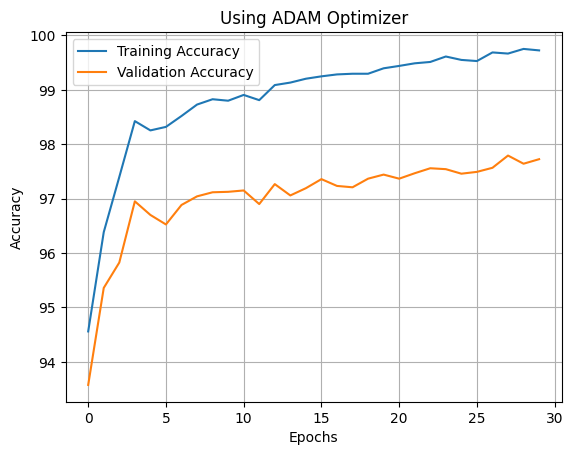

In [194]:
##################################################
#Train the network using Adam optimizer
##################################################
##################################################
#Define the architecture
##################################################

#Complete the below function to impliment ReLU activation function
def ReLu(inp):
  outp = np.where(inp < 0, 0, inp) #works for matrices
  return outp

#Complete the below function to impliment gradient of ReLU activation function
def gradReLu(inp):
  outp = np.where(inp < 0, 0, 1) #works for matrices
  return outp

#Complete the below function to impliment softmax activation function
def softmax(inp):
  #Returns a vector
  # print(inp)
  outp = np.exp(inp)
  # sum = np.sum(outp)
  # outp /= np.sum
  # Now with matrix support lol
  outp = outp/outp.sum(axis=1)[:,None]
  return outp

#Complete the below function to impliment forward propagation of data
# def fwdPropagate(inputs, weights):
#   #Inputs: input data, paramters of network
#   W1, W2, W3 = weights
#   # print(W1, W2, W3)
#   a0 = inputs
#   a1 = a0 @ W1
#   a2 = ReLu(a1) @ W2
#   a3 = ReLu(a2) @ W3
#   y_out = softmax(a3)
#   # print(a3)
#   # print(y_out)
#   # #Return the requires outputs, i.e., final output and intermediate activations
#   outps = [a0, a1, a2, y_out]
#   return outps

def fwdPropagate(inputs, weights, biases):
  #Inputs: input data, paramters of network
  W1, W2, W3 = weights
  b1, b2, b3 = biases
  # print(W1, W2, W3)
  a0 = inputs
  a1 = a0 @ W1 + b1
  a2 = ReLu(a1) @ W2 + b2
  a3 = ReLu(a2) @ W3 + b3
  y_out = sigmoid(a3)
  # #Return the requires outputs, i.e., final output and intermediate activations
  outps = [a0, a1, a2, y_out]
  return outps

#Complete the below function to compute the gradients
def computeGradients(inputs, targets, weights, activations, biases):
  #Inputs: input data, targets, parameters of netwrok, intermediate activations
  a0, a1, a2, y_out = activations
  # delta1, delta2, delta3 = deltas
  W1, W2, W3 = weights
  b1, b2, b3 = biases

  dj_dw1 = np.zeros(W1.shape)
  dj_dw2 = np.zeros(W2.shape)
  dj_dw3 = np.zeros(W3.shape)

  #need to find deltas here
  delta1 = np.zeros(a1.shape)
  delta2 = np.zeros(a1.shape)
  delta3 = np.zeros(a2.shape)

  #Compute the loss
  delta3 = y_out - targets
  delta2 = delta3 @ W3.T
  delta2 *= gradReLu(a2)

  delta1 = delta2 @ W2.T
  delta1 *= gradReLu(a1)
  #Compote the derivative of loss at parameters


  z1 = ReLu(a1)
  z2 = ReLu(a2)

  dj_db3 = np.sum(delta3) / a0.shape[0]
  dj_db2 = np.sum(delta2) / a0.shape[0]
  dj_db1 = np.sum(delta1) / a0.shape[0]

  dj_dw1 = a0.T@delta1 / a0.shape[0]
  dj_dw2 = z1.T@delta2 / a0.shape[0]
  dj_dw3 = z2.T@delta3 / a0.shape[0]
  #Return the gradients

  return [dj_dw1, dj_dw2, dj_dw3, dj_db1, dj_db2, dj_db3]

#Complete the below function to update the parameters using the above computed gradients
def applyGradients_ADAM(weights, m, v, gradients, t, learning_rate, biases, beta1 = 0.9, beta2 = 0.999, eps = 1e-8):
  #Inputs: weights, gradients, and learning rate
  W1, W2, W3 = weights
  b1, b2, b3 = biases
  dj_dw1, dj_dw2, dj_dw3, db1, db2, db3= gradients
  mdw1, mdw2, mdw3, mdb1, mdb2, mdb3 = m
  vdw1, vdw2, vdw3, vdb1, vdb2, vdb3 = v

  mdw1 = beta1 * vdw1 + (1 - beta1) * (dj_dw1)
  mdw2 = beta1 * vdw2 + (1 - beta1) * (dj_dw2)
  mdw3 = beta1 * vdw3 + (1 - beta1) * (dj_dw3)
  mdb1 = beta1 * vdb1 + (1 - beta1) * (db1)
  mdb2 = beta1 * vdb2 + (1 - beta1) * (db2)
  mdb3 = beta1 * vdb3 + (1 - beta1) * (db3)

  vdw1 = beta2 * vdw1 + (1 - beta2) * (dj_dw1**2)
  vdw2 = beta2 * vdw2 + (1 - beta2) * (dj_dw2**2)
  vdw3 = beta2 * vdw3 + (1 - beta2) * (dj_dw3**2)
  vdb1 = beta2 * vdb1 + (1 - beta2) * (db1**2)
  vdb2 = beta2 * vdb2 + (1 - beta2) * (db2**2)
  vdb3 = beta2 * vdb3 + (1 - beta2) * (db3**2)

  cmdw1 = mdw1 / (1 - beta1 ** t)
  cmdw2 = mdw2 / (1 - beta1 ** t)
  cmdw3 = mdw3 / (1 - beta1 ** t)
  cmdb1 = mdb1 / (1 - beta1 ** t)
  cmdb2 = mdb2 / (1 - beta1 ** t)
  cmdb3 = mdb3 / (1 - beta1 ** t)

  cvdw1 = vdw1 / (1 - beta2 ** t)
  cvdw2 = vdw2 / (1 - beta2 ** t)
  cvdw3 = vdw3 / (1 - beta2 ** t)
  cvdb1 = vdb1 / (1 - beta2 ** t)
  cvdb2 = vdb2 / (1 - beta2 ** t)
  cvdb3 = vdb3 / (1 - beta2 ** t)

  alpha = learning_rate * np.sqrt((1 - beta2**t) / (1 - beta1**t))

  W1 = W1 - alpha * mdw1 / (np.sqrt(vdw1) + eps)
  W2 = W2 - alpha * mdw2 / (np.sqrt(vdw2) + eps)
  W3 = W3 - alpha * mdw3 / (np.sqrt(vdw3) + eps)
  b1 = b1 - alpha * mdb1 / (np.sqrt(vdb1) + eps)
  b2 = b2 - alpha * mdb2 / (np.sqrt(vdb2) + eps)
  b3 = b3 - alpha * mdb3 / (np.sqrt(vdb3) + eps)
  #Return the updated parameters
  return [W1, W2, W3], [b1, b2, b3], [mdw1, mdw2, mdw3, mdb1, mdb2, mdb3], [vdw1, vdw2, vdw3, vdb1, vdb2, vdb3]

#Complete the below function to complete the backpropagation ste
def backPropagate_ADAM(inputs, targets, weights, activations, learning_rate, biases, m, v, t):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm
  #Compute the gradients
  gradients = computeGradients(inputs, targets, weights, activations, biases)

  #Update the paramters using gradients
  weights, biases, m, v = applyGradients_ADAM(weights, m, v, gradients, t, learning_rate, biases)
  #Return the updated parameters
  return weights, biases

def onehot(train, n_classes):
  Y = np.zeros((train.shape[0], n_classes))
  Y[np.arange(Y.shape[0]), train] = 1
  return Y

##################################################
#Train the network
##################################################
def getpreds(y_out):
  return np.argmax(y_out, 1)

#Complete the below function to complete the training of network
def training(inputs, targets_idx, batch_size = 128, epochs = 30, train_val_split=0.8, learning_rate=0.001):

  #Set the hyperparameters
  hidden_units = 512
  n_classes = 10

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data
  targ_labels = np.copy(targets_idx)

  targets_idx = onehot(targets_idx, n_classes)
  dataset = inputs
  dataset_targs = targets_idx
  size = int(inputs.shape[0] * train_val_split)

  inputs = dataset[:size, :]
  inputs_targts_idx = dataset_targs[:size, :]
  inputs_labels = targ_labels[:size]
  valid_labels = targ_labels[size:]
  targets_idx = dataset_targs[:size, :]
  valid_inputs = dataset[size:, :]
  valid_targts_idx = dataset_targs[size:, :]


  n_samples = inputs.shape[0]
  n_batches = int(n_samples / batch_size)

  #Randomly initialize the weights
  W1 = np.random.rand(dataset.shape[1], hidden_units) - 0.5
  W2 = np.random.rand(hidden_units, hidden_units) - 0.5
  W3 = np.random.rand(hidden_units, n_classes) - 0.5
  #Interate for epochs times
  biases = np.random.rand(3)
  weights = [W1, W2, W3]
  tr_acc = []
  valid_acc = []
  mdw1 = np.zeros(W1.shape)
  mdw2 = np.zeros(W2.shape)
  mdw3 = np.zeros(W3.shape)
  mdb1 = 0
  mdb2 = 0
  mdb3 = 0
  vdw1 = np.zeros(W1.shape)
  vdw2 = np.zeros(W2.shape)
  vdw3 = np.zeros(W3.shape)
  vdb1 = 0
  vdb2 = 0
  vdb3 = 0
  m = [mdw1, mdw2, mdw3, mdb1, mdb2, mdb3]
  v = [vdw1, vdw2, vdw3, vdb1, vdb2, vdb3]
  for epoch in range(epochs):
    #Shuffle the training data
    shuffle_ind = np.random.permutation(inputs.shape[0])
    input_shuff = inputs[shuffle_ind, :]
    targets_idx_shuff= inputs_targts_idx[shuffle_ind]
    #Iterate through the batches of data
    for batch in range(n_batches):
      # print(epoch + 1, batch + 1)
      low = batch * batch_size
      hi = min((batch + 1) * batch_size, inputs.shape[0])
      #Forward propagation
      batch_input = input_shuff[low:hi, :]
      batch_targets = targets_idx_shuff[low:hi]
      activations = fwdPropagate(batch_input, weights, biases)
      #Backward propagation
      t = epoch * n_batches + batch + 1
      weights, biases = backPropagate_ADAM(batch_input, batch_targets, weights, activations, learning_rate, biases, m, v, t)
    #Compute outpus on trianing data
    _ = fwdPropagate(inputs, weights, biases)
    y_out = _[3]

    #Compute training accuracy, and training error
    tr_acc.append(np.sum(getpreds(y_out) == inputs_labels) / inputs_labels.shape[0] * 100)
    #Compute outputs on validation data
    _ = fwdPropagate(valid_inputs, weights, biases)
    y_out = _[3]

    #Compute validation accuracy, and validation error
    valid_acc.append(np.sum(getpreds(y_out) == valid_labels) / valid_labels.shape[0] * 100)
    #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
    print('Epoch', epoch + 1, 'Training Accuracy = ', tr_acc[-1], '%')
    print('Epoch', epoch + 1, 'Validation Accuracy = ', valid_acc[-1], '%')
  plt.plot(np.arange(epochs), tr_acc, label = 'Training Accuracy')
  plt.plot(np.arange(epochs), valid_acc, label = 'Validation Accuracy')
  plt.grid()
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.title('Using ADAM Optimizer')
    #Save the parameters of network
  return weights, biases

#Call the training function to train the network
W, B = training(mnist_traindata, mnist_trainlabel)

##################################################
#Evaluate the performance on test data
##################################################
bru = mnist_testdata[:, :]
bru = bru / 256
_ = fwdPropagate(bru, W, B)
y_out = _[3]
print("\n\nTest accuracy using ADAM optimizer = ", np.sum(getpreds(y_out) == mnist_testlabel)/y_out.shape[0] * 100, '%\n')





##################################################
#Compare the accuracies and report your observations
##################################################








<b> Report your observations </b>

1. We can see how well the ADAM optimizer performs. In the first iteration itself it has $94.33$% and goes to $99.725$% in 30 Epochs. This is a huge improvement over the normal SGD.

2. Even the test accuracy is much better and the algorithm runs faster.



<b> Part - (4) : Understanding regularization methods: </b> In this part of the assignment, you will learn about a few regularization techniques to reduce the overfitting problem. Using the above built network, include the following techniques to reduce the overfitting by retraining the network efficiently. Write down the accuracies for each case.
<dt> <h6> 1. Weight regularization: Add regularization term to the classification los </dt> </h6>
<dt> <h6> 2. Dropout with a probability of 0.2: Randomly drop the activation potentials of hidden neural with 0.2 probability. Disable the dropout layer in inference model. You can experiment with different dropout probabilities and report your observations.  </dt> </h6>
<dt> <h6> 3. Early stopping: Stop the network training when it is started to overfitting to training data. </dt> </h6>


Epoch 1 Training Accuracy =  77.67708333333333 %
Epoch 1 Validation Accuracy =  79.00833333333334 %
Epoch 2 Training Accuracy =  82.68541666666667 %
Epoch 2 Validation Accuracy =  84.025 %
Epoch 3 Training Accuracy =  85.1 %
Epoch 3 Validation Accuracy =  86.01666666666667 %
Epoch 4 Training Accuracy =  86.45416666666667 %
Epoch 4 Validation Accuracy =  87.675 %
Epoch 5 Training Accuracy =  87.42916666666667 %
Epoch 5 Validation Accuracy =  88.66666666666667 %
Epoch 6 Training Accuracy =  88.07916666666667 %
Epoch 6 Validation Accuracy =  89.39166666666667 %
Epoch 7 Training Accuracy =  88.77916666666667 %
Epoch 7 Validation Accuracy =  89.775 %
Epoch 8 Training Accuracy =  89.24791666666667 %
Epoch 8 Validation Accuracy =  90.18333333333334 %
Epoch 9 Training Accuracy =  89.69166666666666 %
Epoch 9 Validation Accuracy =  90.53333333333333 %
Epoch 10 Training Accuracy =  90.08125 %
Epoch 10 Validation Accuracy =  90.925 %


Test accuracy using weight regularization =  89.81 %

Epoch 1 

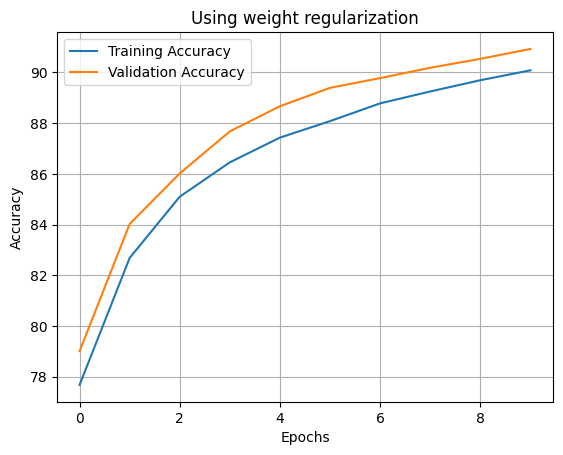

In [203]:
##################################################
#Training with weight regularization
##################################################
##################################################
#Define the architecture
##################################################

#Complete the below function to impliment ReLU activation function
def ReLu(inp):
  outp = np.where(inp < 0, 0, inp) #works for matrices
  return outp

#Complete the below function to impliment gradient of ReLU activation function
def gradReLu(inp):
  outp = np.where(inp < 0, 0, 1) #works for matrices
  return outp

#Complete the below function to impliment softmax activation function
def softmax(inp):
  #Returns a vector
  # print(inp)
  outp = np.exp(inp)
  # sum = np.sum(outp)
  # outp /= np.sum
  # Now with matrix support lol
  outp = outp/outp.sum(axis=1)[:,None]
  return outp

def fwdPropagate(inputs, weights, biases):
  #Inputs: input data, paramters of network
  W1, W2, W3 = weights
  b1, b2, b3 = biases
  # print(W1, W2, W3)
  a0 = inputs
  a1 = a0 @ W1 + b1
  a2 = ReLu(a1) @ W2 + b2
  a3 = ReLu(a2) @ W3 + b3
  y_out = sigmoid(a3)
  # #Return the requires outputs, i.e., final output and intermediate activations
  outps = [a0, a1, a2, y_out]
  return outps

#Complete the below function to compute the gradients
def computeGradients(inputs, targets, weights, activations, biases, lamda):
  #Inputs: input data, targets, parameters of netwrok, intermediate activations
  a0, a1, a2, y_out = activations
  # delta1, delta2, delta3 = deltas
  W1, W2, W3 = weights
  b1, b2, b3 = biases

  dj_dw1 = np.zeros(W1.shape)
  dj_dw2 = np.zeros(W2.shape)
  dj_dw3 = np.zeros(W3.shape)

  #need to find deltas here
  delta1 = np.zeros(a1.shape)
  delta2 = np.zeros(a1.shape)
  delta3 = np.zeros(a2.shape)

  #Compute the loss
  delta3 = y_out - targets
  delta2 = delta3 @ W3.T
  delta2 *= gradReLu(a2)

  delta1 = delta2 @ W2.T
  delta1 *= gradReLu(a1)
  #Compote the derivative of loss at parameters


  z1 = ReLu(a1)
  z2 = ReLu(a2)

  dj_db3 = np.sum(delta3) / a0.shape[0]
  dj_db2 = np.sum(delta2) / a0.shape[0]
  dj_db1 = np.sum(delta1) / a0.shape[0]

  dj_dw1 = a0.T@delta1 / a0.shape[0] + lamda * W1
  dj_dw2 = z1.T@delta2 / a0.shape[0] + lamda * W2
  dj_dw3 = z2.T@delta3 / a0.shape[0] + lamda * W3
  #Return the gradients

  return [dj_dw1, dj_dw2, dj_dw3, dj_db1, dj_db2, dj_db3]

#Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate, biases):
  #Inputs: weights, gradients, and learning rate
  W1, W2, W3 = weights
  b1, b2, b3 = biases
  dj_dw1, dj_dw2, dj_dw3, db1, db2, db3= gradients
  W1 = W1 - learning_rate * dj_dw1
  W2 = W2 - learning_rate * dj_dw2
  W3 = W3 - learning_rate * dj_dw3
  b1 = b1 - learning_rate * db1
  b2 = b2 - learning_rate * db2
  b3 = b3 - learning_rate * db3
  #Return the updated parameters
  return [W1, W2, W3], [b1, b2, b3]

#Complete the below function to complete the backpropagation ste
def backPropagate(inputs, targets, weights, activations, learning_rate, biases, lamda):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm
  #Compute the gradients
  gradients = computeGradients(inputs, targets, weights, activations, biases, lamda)

  #Update the paramters using gradients
  weights, biases = applyGradients(weights, gradients, learning_rate, biases)
  #Return the updated parameters
  return weights, biases

def onehot(train, n_classes):
  Y = np.zeros((train.shape[0], n_classes))
  Y[np.arange(Y.shape[0]), train] = 1
  return Y

##################################################
#Train the network
##################################################
def getpreds(y_out):
  return np.argmax(y_out, 1)

#Complete the below function to complete the training of network
def training(inputs, targets_idx, lamda, batch_size = 128, epochs = 10, train_val_split=0.8, learning_rate=0.001):

  #Set the hyperparameters
  hidden_units = 512
  n_classes = 10

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data
  targ_labels = np.copy(targets_idx)

  targets_idx = onehot(targets_idx, n_classes)
  dataset = inputs
  dataset_targs = targets_idx
  size = int(inputs.shape[0] * train_val_split)

  inputs = dataset[:size, :]
  inputs_labels = targ_labels[:size]
  valid_labels = targ_labels[size:]
  targets_idx = dataset_targs[:size, :]
  valid_inputs = dataset[size:, :]
  valid_targts_idx = dataset_targs[size:, :]


  n_samples = dataset.shape[0]
  n_batches = int(n_samples / batch_size)

  #Randomly initialize the weights
  W1 = np.random.rand(dataset.shape[1], hidden_units) - 0.5
  W2 = np.random.rand(hidden_units, hidden_units) - 0.5
  W3 = np.random.rand(hidden_units, n_classes) - 0.5
  #Interate for epochs times
  biases = np.random.rand(3)
  weights = [W1, W2, W3]
  tr_acc = []
  valid_acc = []
  for epoch in range(epochs):
    #Shuffle the training data
    shuffle_ind = np.random.permutation(dataset.shape[0])
    input_shuff = dataset[shuffle_ind, :]
    targets_idx_shuff= dataset_targs[shuffle_ind]
    #Iterate through the batches of data
    for batch in range(n_batches):
      # print(epoch + 1, batch + 1)
      low = batch * batch_size
      hi = min((batch + 1) * batch_size, dataset.shape[0])
      #Forward propagation
      batch_input = input_shuff[low:hi, :]
      batch_targets = targets_idx_shuff[low:hi]
      activations = fwdPropagate(batch_input, weights, biases)
      #Backward propagation
      weights, biases = backPropagate(batch_input, batch_targets, weights, activations, learning_rate, biases, lamda)
    #Compute outpus on trianing data
    _ = fwdPropagate(inputs, weights, biases)
    y_out = _[3]

    #Compute training accuracy, and training error
    tr_acc.append(np.sum(getpreds(y_out) == inputs_labels) / inputs_labels.shape[0] * 100)
    #Compute outputs on validation data
    _ = fwdPropagate(valid_inputs, weights, biases)
    y_out = _[3]

    #Compute validation accuracy, and validation error
    valid_acc.append(np.sum(getpreds(y_out) == valid_labels) / valid_labels.shape[0] * 100)
    #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
    print('Epoch', epoch + 1, 'Training Accuracy = ', tr_acc[-1], '%')
    print('Epoch', epoch + 1, 'Validation Accuracy = ', valid_acc[-1], '%')
  plt.plot(np.arange(epochs), tr_acc, label = 'Training Accuracy')
  plt.plot(np.arange(epochs), valid_acc, label = 'Validation Accuracy')
  plt.grid()
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.title('Using weight regularization')
    #Save the parameters of network
  return weights, biases

#Call the training function to train the network
W, B = training(mnist_traindata, mnist_trainlabel, 1e-7)

##################################################
#Evaluate the performance on test data
##################################################
bru = mnist_testdata[:, :]
bru = bru / 256
_ = fwdPropagate(bru, W, B)
y_out = _[3]
print("\n\nTest accuracy using weight regularization = ", np.sum(getpreds(y_out) == mnist_testlabel)/y_out.shape[0] * 100, '%\n')

##################################################
#Training with dropout strategy
##################################################
##################################################
#Define the architecture
##################################################

#Complete the below function to impliment ReLU activation function
def ReLu(inp):
  outp = np.where(inp < 0, 0, inp) #works for matrices
  return outp

#Complete the below function to impliment gradient of ReLU activation function
def gradReLu(inp):
  outp = np.where(inp < 0, 0, 1) #works for matrices
  return outp

#Complete the below function to impliment softmax activation function
def softmax(inp):
  #Returns a vector
  outp = np.exp(inp)
  outp = outp/outp.sum(axis=1)[:,None]
  return outp

#Complete the below function to impliment forward propagation of data
def fwdPropagate(inputs, weights, Mask):
  #Inputs: input data, paramters of network
  W1, W2, W3 = weights
  mask1, mask2 = Mask
  a0 = inputs
  a1 = a0 @ W1
  a2 = (ReLu(a1) * np.outer(np.ones(a1.shape[0]),mask1)) @ W2
  a3 = (ReLu(a2) * np.outer(np.ones(a2.shape[0]),mask2)) @ W3
  y_out = softmax(a3)
  # #Return the requires outputs, i.e., final output and intermediate activations
  outps = [a0, a1, a2, y_out]
  return outps

def onehot(train, n_classes):
  Y = np.zeros((train.shape[0], n_classes))
  Y[np.arange(Y.shape[0]), train] = 1
  return Y
#Complete the below function to compute the gradients
def computeGradients(inputs, targets, weights, activations, Mask):
  #Inputs: input data, targets, parameters of netwrok, intermediate activations
  # a0, a1, a2, y_out = activations
  mask1, mask2 = Mask
  a0, a1, a2, y_out = activations
  # delta1, delta2, delta3 = deltas
  W1, W2, W3 = weights

  dj_dw1 = np.zeros(W1.shape)
  dj_dw2 = np.zeros(W2.shape)
  dj_dw3 = np.zeros(W3.shape)

  #need to find deltas here
  delta1 = np.zeros(a1.shape)
  delta2 = np.zeros(a1.shape)
  delta3 = np.zeros(a2.shape)

  #Compute the loss
  delta3 = y_out - targets
  delta2 = delta3 @ W3.T
  delta2 *= gradReLu(a2)

  delta2 *= np.outer(np.ones(delta2.shape[0]), mask2)


  delta1 = delta2 @ W2.T
  delta1 *= gradReLu(a1)
  delta1 *= np.outer(np.ones(delta1.shape[0]), mask1)
  #Compote the derivative of loss at parameters

  z1 = ReLu(a1)
  z2 = ReLu(a2)

  dj_dw1 = a0.T@delta1 / a0.shape[0]
  dj_dw2 = z1.T@delta2 / a0.shape[0]
  dj_dw3 = z2.T@delta3 / a0.shape[0]
  #Return the gradients
  return [dj_dw1, dj_dw2, dj_dw3]

#Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate):
  #Inputs: weights, gradients, and learning rate
  W1, W2, W3 = weights
  dj_dw1, dj_dw2, dj_dw3 = gradients
  W1 = W1 - learning_rate * dj_dw1
  W2 = W2 - learning_rate * dj_dw2
  W3 = W3 - learning_rate * dj_dw3
  #Return the updated parameters
  return [W1, W2, W3]

#Complete the below function to complete the backpropagation ste
def backPropagate(inputs, targets, weights, activations, learning_rate, Mask):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm
  #Compute the gradients
  gradients = computeGradients(inputs, targets, weights, activations, Mask)

  #Update the paramters using gradients
  weights = applyGradients(weights, gradients, learning_rate)
  #Return the updated parameters
  return weights


##################################################
#Train the network
##################################################
def getpreds(y_out):
  return np.argmax(y_out, 1)

#Complete the below function to complete the training of network
def training(inputs, targets_idx, batch_size = 128, epochs=5, train_val_split=0.8, learning_rate=0.001):

  #Set the hyperparameters
  hidden_units = 512
  n_classes = 10

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data
  targ_labels = np.copy(targets_idx)

  targets_idx = onehot(targets_idx, n_classes)
  dataset = inputs
  dataset_targs = targets_idx
  size = int(inputs.shape[0] * train_val_split)

  inputs = dataset[:size, :]
  inputs_labels = targ_labels[:size]
  valid_labels = targ_labels[size:]
  targets_idx = dataset_targs[:size, :]
  valid_inputs = dataset[size:, :]
  valid_targts_idx = dataset_targs[size:, :]


  n_samples = inputs.shape[0]
  n_batches = int(n_samples / batch_size)
  #Randomly initialize the weights
  W1 = np.random.rand(inputs.shape[1], hidden_units) - 0.5
  W2 = np.random.rand(hidden_units, hidden_units) - 0.5
  W3 = np.random.rand(hidden_units, n_classes) - 0.5
  # targets_idx = onehot(targets_idx, n_classes)

  #Interate for epochs times
  weights = [W1, W2, W3]

  for epoch in range(epochs):
    #Shuffle the training data
    shuffle_ind = np.random.permutation(inputs.shape[0])
    input_shuff = inputs[shuffle_ind, :]

    targets_idx_shuff= targets_idx[shuffle_ind]
    #Iterate through the batches of data
    for batch in range(n_batches):
      low = batch * batch_size
      hi = min((batch + 1) * batch_size, inputs.shape[0])
      #Forward propagation
      batch_input = input_shuff[low:hi, :]
      batch_targets = targets_idx_shuff[low:hi]

      mask1 = np.ones(W1.shape[1])
      mask2 = np.ones(W2.shape[1])
      mask1 = np.random.choice(2, mask1.shape[0], p = [0.2, 0.8])[0]
      mask2 = np.random.choice(2, mask2.shape[0], p = [0.2, 0.8])[0]

      Mask = [mask1, mask2]
      activations = fwdPropagate(batch_input, weights, Mask)

      #Backward propagation
      weights = backPropagate(batch_input, batch_targets, weights, activations, learning_rate, Mask)
    mask1 = np.ones(W1.shape[1])
    mask2 = np.ones(W2.shape[1])
    Mask = [mask1, mask2]
    _ = fwdPropagate(inputs, weights, Mask)
    y_out = _[3]
    print('Epoch', epoch + 1, 'Accuracy = ', np.sum(getpreds(y_out) == inputs_labels) / inputs_labels.shape[0] * 100, '%')
    _ = fwdPropagate(valid_inputs, weights, Mask)
    y_out = _[3]
    print('Epoch', epoch + 1, 'Accuracy = ', np.sum(getpreds(y_out) == valid_labels) / valid_labels.shape[0] * 100, '%')
    #Compute outpus on trianing data

  return weights


#Call the training function to train the network
W = training(mnist_traindata, mnist_trainlabel)
bru = mnist_testdata[:, :]
bru = bru / 256
mask1 = np.ones(512)
mask2 = np.ones(512)
Mask = [mask1, mask2]
_ = fwdPropagate(bru, W, Mask)
y_out = _[3]
print("\n\nTest accuracy using dropout = ", np.sum(getpreds(y_out) == mnist_testlabel)/y_out.shape[0] * 100, '%\n')

<b> Report your observations </b>

1. Using weight regularization, the accuracy is good, and converges relatively fast.

2. Using dropout, the weights are overflowing at higher epochs, but it converges at a few epochs.




<b> Part - (5) : Comparision with linear classifiers: </b> In this part of the assignment, you will compare the performance of deep neural network based classification models with the linear classification models. You will be provided with codes to generate two types of binary classification data. First type of data is linearly separabble. The second type of data is not linearly separable. You have to classify these two types of data bases using both deep neural network models and linear classification models.

<dt> <h6> 1. Linearly separable data: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 3  \\ 3  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 4500 samples per class for training and 500 samples for testing.
</dt> </h6>
<dt> <h6> 2. Non-linearly separable data: Given code generates binary classification data that is not linearly separable. Each class has around 5000 data points. Class1 data is denoted with the variable "class1_data". Class2 data is denoted with the variable "class2_data". Use 90% of data for training and 10 % for testing.    </dt> </h6>

<dt> <h6> <b> Programming questions: </b> </dt> </h6>

<dt> <h6> 3. Linear classification models - logistic regression ( Iterative reweighted least squares approach ): logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. Given the training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data X_test. </dt> </h6>
<dd> <h6> a). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.
</dd> </h6>
<dd> <h6> b). Evaluate the classification performance, i.e., compute the accuracy on the test data. </dd> </h6>
<dd> <h6> c). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different. </dd> </h6>

<dt> <h6> 4. Deep neural network based classification models: Let us cosider feed-forward neural network with three layers. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dt> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dt> </h6>

<dd> <h6> - where $\textbf{W}_{1} \in \mathcal{R}^{3 \times 2}$,$\textbf{W}_{2} \in \mathcal{R}^{3 \times 3}$,$\textbf{W}_{3} \in \mathcal{R}^{1 \times 3} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dt> </h6>

<dd> <h6> - Consider g(.) as ReLU activation function. Sigmoid activation function should be used at the last layer h(.), to get the posterior probability of the class1. Class2 posterior probability can obtained by (1 - class1 posterior probability). </dt> </h6>
<dd> <h6> - Train the binary classification network using the given training data. Plot second layer activation potentials, i.e., feed-forward the entire data to obtain the 3 dimensional activation potentials at second layer. Plot them and observe how they distribute in the 3-dimensional space compared to the original 2-dimensional space. </dt> </h6>
<dd> <h6> - Evaluate the classification performance on test data. Report your observations </dt> </h6>

<dt> <h6> 3. Compare linear classification models with the deep neural network based classification models. Report your observations. </dt> </h6>



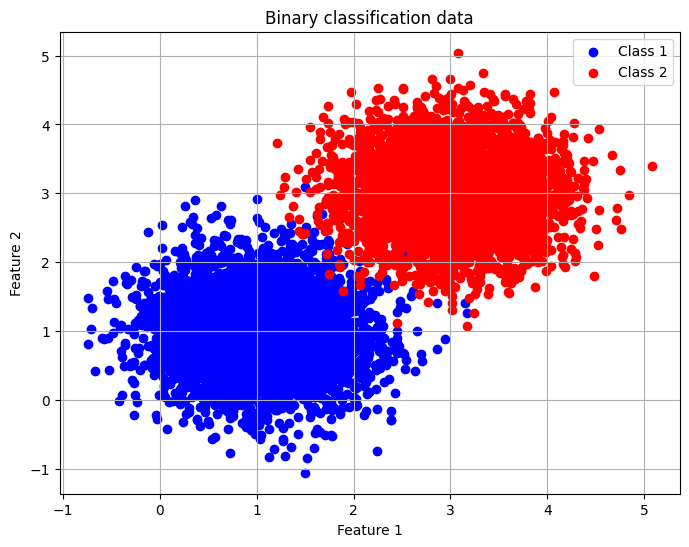

In [241]:
##################################################
#Generating binary classification data (linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()




 Accuracy with Logistic Regression: 0.994 


Epoch 1 Training Accuracy =  97.5 %
Epoch 1 Validation Accuracy =  93.16666666666666 %

Epoch 2 Training Accuracy =  99.68055555555554 %
Epoch 2 Validation Accuracy =  99.3888888888889 %

Epoch 3 Training Accuracy =  99.625 %
Epoch 3 Validation Accuracy =  99.22222222222223 %

Epoch 4 Training Accuracy =  99.68055555555554 %
Epoch 4 Validation Accuracy =  99.5 %

Epoch 5 Training Accuracy =  99.69444444444444 %
Epoch 5 Validation Accuracy =  99.3888888888889 %

Epoch 6 Training Accuracy =  99.6111111111111 %
Epoch 6 Validation Accuracy =  99.16666666666667 %

Epoch 7 Training Accuracy =  99.65277777777779 %
Epoch 7 Validation Accuracy =  99.27777777777777 %

Epoch 8 Training Accuracy =  99.69444444444444 %
Epoch 8 Validation Accuracy =  99.44444444444444 %

Epoch 9 Training Accuracy =  99.69444444444444 %
Epoch 9 Validation Accuracy =  99.3888888888889 %

Epoch 10 Training Accuracy =  99.69444444444444 %
Epoch 10 Validation Accuracy =  99.

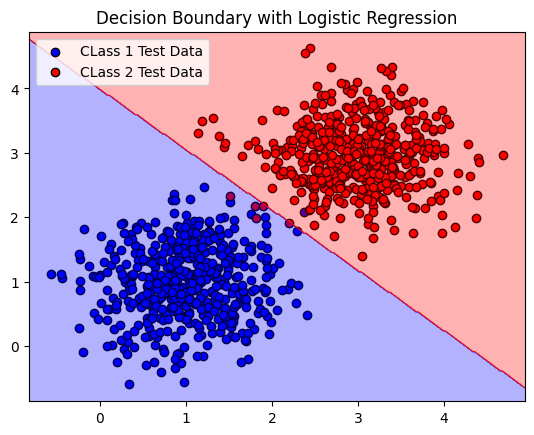

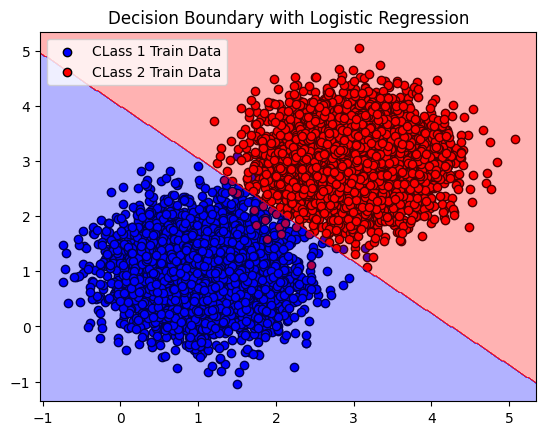

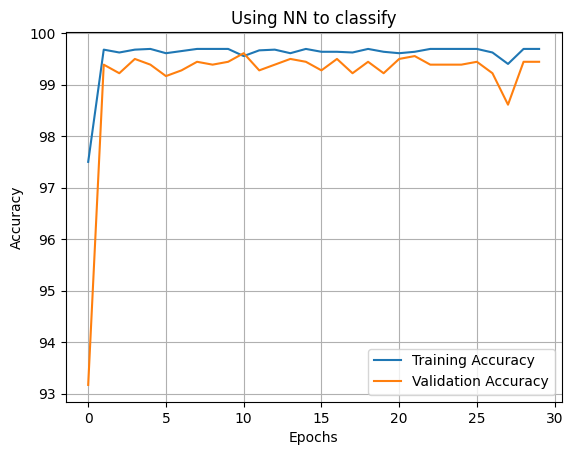

In [243]:
##################################################
#Classify the linearly separable data using linear classification models
##################################################

from matplotlib.colors import ListedColormap
def Logistic_Regression(X_train, Y_train, X_test):
  #Inputs: Training data, Training labels, and Testing data
  #Outputs: Predictions on test data
  max_iter = 100 #max number of ierations for parameter update
  threshold = 0.5#threshold for classification
  X =  np.c_[np.ones((X_train.shape[0], 1)), X_train]       #Data. Append ones to the training data to take care of the bias
  w =  np.random.rand(3)        #Initialize the weight vector
  for iter in range(0,max_iter,1):
    preds =  X@w  #Predictions on X. Sigmoid(w^T.x)
    logi = 1/(1 + np.exp(-preds))
    error =  np.abs(preds - Y_train)  #Difference between preds and Y_train
    # print(Y_train.shape)
    #Compute the gradients and the appropriate learning rate. We can use Hessian matrix as learning rate
    R = np.eye(Y_train.shape[0])
    for i in range (Y_train.shape[0]):
      # y_n = 1/(1 + np.exp(-(w.T@X_train[i])))
      y_n = logi[i]
      R[i][i] = y_n * (1 - y_n)
    #Update the weight vector
    w = w - (np.linalg.inv(X.T@R@X))@X.T@(logi - Y_train)

  #Test data predictions
  # print(X_test.shape, w.shape)
  X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]
  test_preds = X_test_bias @ w


  #Compare the predictions with 0, to output the decision
  test_preds = np.where(test_preds > 0.5, 1, 0)


  #Return the predicted test labels
  return test_preds, w


Y_pred, w = Logistic_Regression(tr_data, tr_targets, te_data)

###############################################
#Part-5)-c:
###############################################
def LR_Accuracy(Y_test, Y_pred):
  #Inputs: Ground truth and predicted lables of test data
  #Outputs: Accuracy
  acc = 0
  for i in range(Y_test.shape[0]):
    if(Y_test[i] == Y_pred[i]):
      acc+=1
  #Compute and return the accuracy
  acc /= Y_test.shape[0]
  return acc


acc = LR_Accuracy(te_targets, Y_pred)
print('\n\n Accuracy with Logistic Regression:', acc, '\n\n')

plt.figure()
plt.scatter(class1_te[:, 0], class1_te[:, 1], color = 'blue', label = 'CLass 1 Test Data', edgecolor = 'k')
plt.scatter(class2_te[:, 0], class2_te[:, 1], color = 'red', label = 'CLass 2 Test Data', edgecolor = 'k')
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                    np.arange(y_min, y_max, 0.02))

# Flatten the meshgrid to make predictions
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_bias = np.c_[np.ones(grid_points.shape[0]), grid_points]
# print(grid_points)
Z = grid_points_bias @ w
Z = np.where(Z > 0.5, 1, 0)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=ListedColormap(['blue', 'red']),alpha=0.3)
plt.legend()
plt.title('Decision Boundary with Logistic Regression')

plt.figure()
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color = 'blue', label = 'CLass 1 Train Data', edgecolor = 'k')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color = 'red', label = 'CLass 2 Train Data', edgecolor = 'k')
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                    np.arange(y_min, y_max, 0.02))

# Flatten the meshgrid to make predictions
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_bias = np.c_[np.ones(grid_points.shape[0]), grid_points]
# print(grid_points)
Z = grid_points_bias @ w
Z = np.where(Z > 0.5, 1, 0)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=ListedColormap(['blue', 'red']),alpha=0.3)
plt.legend()
plt.title('Decision Boundary with Logistic Regression')

##################################################
#Classify the linearly separable data using deep neural based classification models
##################################################


##################################################
#Define the architecture
##################################################

#Complete the below function to impliment ReLU activation function
def ReLu(inp):
  outp = np.where(inp < 0, 0, inp) #works for matrices
  return outp

#Complete the below function to impliment gradient of ReLU activation function
def gradReLu(inp):
  outp = np.where(inp < 0, 0, 1) #works for matrices
  return outp

#Complete the below function to impliment softmax activation function
def sigmoid(inp):
  #Returns a vector
  # print(inp)
  outp = 1/ (1 + np.exp(-inp))
  return outp

#Complete the below function to impliment forward propagation of data
def fwdPropagate(inputs, weights, biases):
  #Inputs: input data, paramters of network
  W1, W2, W3 = weights
  b1, b2, b3 = biases
  # print(W1, W2, W3)
  a0 = inputs
  a1 = a0 @ W1 + b1
  a2 = ReLu(a1) @ W2 + b2
  a3 = ReLu(a2) @ W3 + b3
  y_out = sigmoid(a3)
  # #Return the requires outputs, i.e., final output and intermediate activations
  outps = [a0, a1, a2, y_out]
  return outps

#Complete the below function to compute the gradients
def computeGradients(inputs, targets, weights, activations, biases):
  #Inputs: input data, targets, parameters of netwrok, intermediate activations
  a0, a1, a2, y_out = activations
  # delta1, delta2, delta3 = deltas
  W1, W2, W3 = weights
  b1, b2, b3 = biases

  dj_dw1 = np.zeros(W1.shape)
  dj_dw2 = np.zeros(W2.shape)
  dj_dw3 = np.zeros(W3.shape)

  #need to find deltas here
  delta1 = np.zeros(a1.shape)
  delta2 = np.zeros(a1.shape)
  delta3 = np.zeros(a2.shape)

  #Compute the loss
  delta3 = y_out - targets
  delta2 = delta3 @ W3.T
  delta2 *= gradReLu(a2)

  delta1 = delta2 @ W2.T
  delta1 *= gradReLu(a1)
  #Compote the derivative of loss at parameters


  z1 = ReLu(a1)
  z2 = ReLu(a2)

  dj_db3 = np.sum(delta3) / a0.shape[0]
  dj_db2 = np.sum(delta2) / a0.shape[0]
  dj_db1 = np.sum(delta1) / a0.shape[0]

  dj_dw1 = a0.T@delta1 / a0.shape[0]
  dj_dw2 = z1.T@delta2 / a0.shape[0]
  dj_dw3 = z2.T@delta3 / a0.shape[0]
  #Return the gradients

  return [dj_dw1, dj_dw2, dj_dw3, dj_db1, dj_db2, dj_db3]

#Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate, biases):
  #Inputs: weights, gradients, and learning rate
  W1, W2, W3 = weights
  b1, b2, b3 = biases
  dj_dw1, dj_dw2, dj_dw3, db1, db2, db3= gradients
  W1 = W1 - learning_rate * dj_dw1
  W2 = W2 - learning_rate * dj_dw2
  W3 = W3 - learning_rate * dj_dw3
  b1 = b1 - learning_rate * db1
  b2 = b2 - learning_rate * db2
  b3 = b3 - learning_rate * db3
  #Return the updated parameters
  return [W1, W2, W3], [b1, b2, b3]

#Complete the below function to complete the backpropagation ste
def backPropagate(inputs, targets, weights, activations, learning_rate, biases):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm
  #Compute the gradients
  gradients = computeGradients(inputs, targets, weights, activations, biases)

  #Update the paramters using gradients
  weights, biases = applyGradients(weights, gradients, learning_rate, biases)
  #Return the updated parameters
  return weights, biases

def getpreds(y_out):
  return np.where(y_out > 0.5, 1, 0)

#Complete the below function to complete the training of network
def training(inputs, targets_idx, batch_size = 1, epochs = 30, train_val_split=0.8, learning_rate=0.001):

  #Set the hyperparameters
  hidden_units = 2
  n_classes = 1

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data
  targ_labels = np.copy(targets_idx)
  dataset = inputs
  dataset_targs = targets_idx.reshape(targets_idx.shape[0], 1)
  size = int(inputs.shape[0] * train_val_split)

  inputs = dataset[:size, :]
  inputs_labels = targ_labels[:size]
  valid_labels = targ_labels[size:]
  targets_idx = dataset_targs[:size]
  valid_inputs = dataset[size:, :]
  valid_targts_idx = dataset_targs[size:]


  n_samples = inputs.shape[0]
  n_batches = int(n_samples / batch_size)

  #Randomly initialize the weights
  W1 = np.random.rand(2, 3) - 0.5
  W2 = np.random.rand(3, 3) - 0.5
  W3 = np.random.rand(3, n_classes) - 0.5
  #Interate for epochs times
  biases = np.random.rand(3)
  weights = [W1, W2, W3]
  tr_acc = []
  valid_acc = []
  for epoch in range(epochs):
    #Shuffle the training data
    shuffle_ind = np.random.permutation(inputs.shape[0])
    input_shuff = inputs[shuffle_ind, :]
    targets_idx_shuff= targets_idx[shuffle_ind]
    #Iterate through the batches of data
    for batch in range(n_batches):
      low = batch * batch_size
      hi = min((batch + 1) * batch_size, inputs.shape[0])
      #Forward propagation
      batch_input = input_shuff[low:hi, :]
      batch_targets = targets_idx_shuff[low:hi]
      activations = fwdPropagate(batch_input, weights, biases)
      #Backward propagation
      weights, biases = backPropagate(batch_input, batch_targets, weights, activations, learning_rate, biases)
    #Compute outpus on trianing data
    _ = fwdPropagate(inputs, weights, biases)
    y_out = _[3]
    tr_acc.append(np.sum(getpreds(y_out) == np.array(inputs_labels.reshape(inputs_labels.shape[0], 1), dtype = np.intc)) / inputs_labels.shape[0] * 100)
    #Compute outputs on validation data
    _ = fwdPropagate(valid_inputs, weights, biases)
    y_out = _[3]
    #Compute validation accuracy, and validation error
    valid_acc.append(np.sum(getpreds(y_out) == valid_labels.reshape(valid_labels.shape[0], 1)) / valid_labels.shape[0] * 100)

    #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
    print('Epoch', epoch + 1, 'Training Accuracy = ', tr_acc[-1], '%')
    print('Epoch', epoch + 1, 'Validation Accuracy = ', valid_acc[-1], '%\n')
    #Save the parameters of network
  plt.figure()
  plt.plot(np.arange(epochs), tr_acc, label = 'Training Accuracy')
  plt.plot(np.arange(epochs), valid_acc, label = 'Validation Accuracy')
  plt.grid()
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.title('Using NN to classify')
  return weights, biases

#Call the training function to train the network
tr_targets = np.array(tr_targets, dtype = np.intc)
W, B = training(tr_data, tr_targets)

_ = fwdPropagate(te_data, W, B)
y_out = _[3]
print('Testing Accuracy = ',np.sum(getpreds(y_out) == np.array(te_targets.reshape(te_targets.shape[0], 1), dtype = np.intc)) / te_targets.shape[0] * 100)




##################################################
#Compare the performance of both the models on linearly separable data
##################################################
# since data is linearly seperable, logistic regression does extremely well
# the NN also does a great job at classifying the data
# Both models give 99+ % accuracy


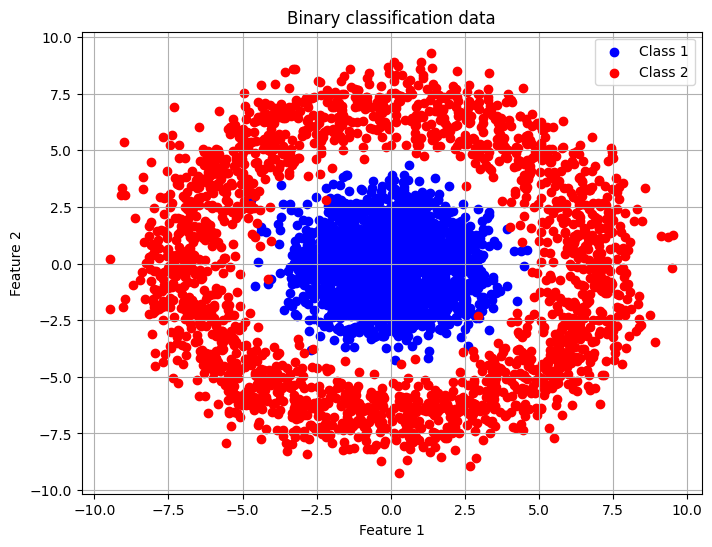

In [254]:
###################################################
#Generating binary classification data (non-linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data for concentric circles
def generate_concentric_data(n_samples, radius1,radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std*np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 2000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_data, class2_data = generate_concentric_data(n_samples, radius1,radius2,noise_std)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()

class1_tr = class1_data[:1800]
class2_tr = class2_data[:1800]

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

class1_te = class1_data[1800:]
class2_te = class2_data[1800:]

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])



 Accuracy with Logistic Regression: 0.5 




Text(0.5, 1.0, 'Decision Boundary with Logistic Regression')

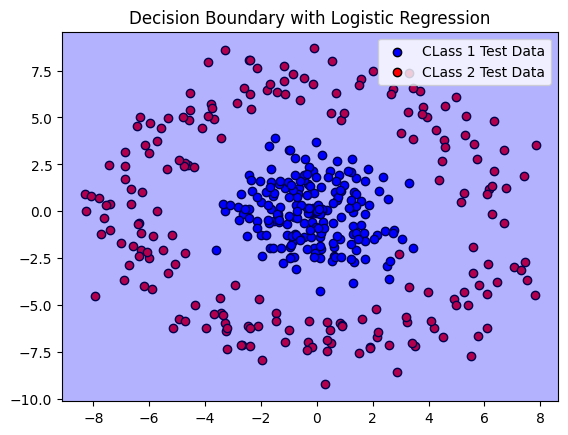

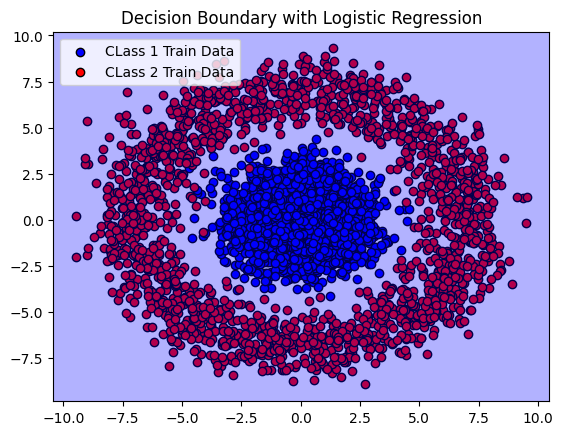

In [255]:
##################################################
#Classify the non-linearly separable data using linear classification models
##################################################
Y_pred, w = Logistic_Regression(tr_data, tr_targets, te_data)

acc = LR_Accuracy(te_targets, Y_pred)
print('\n\n Accuracy with Logistic Regression:', acc, '\n\n')

plt.figure()
plt.scatter(class1_te[:, 0], class1_te[:, 1], color = 'blue', label = 'CLass 1 Test Data', edgecolor = 'k')
plt.scatter(class2_te[:, 0], class2_te[:, 1], color = 'red', label = 'CLass 2 Test Data', edgecolor = 'k')
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                    np.arange(y_min, y_max, 0.02))

# Flatten the meshgrid to make predictions
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_bias = np.c_[np.ones(grid_points.shape[0]), grid_points]
# print(grid_points)
Z = grid_points_bias @ w
Z = np.where(Z > 0.5, 1, 0)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=ListedColormap(['blue', 'red']),alpha=0.3)
plt.legend()
plt.title('Decision Boundary with Logistic Regression')

plt.figure()
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color = 'blue', label = 'CLass 1 Train Data', edgecolor = 'k')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color = 'red', label = 'CLass 2 Train Data', edgecolor = 'k')
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                    np.arange(y_min, y_max, 0.02))

# Flatten the meshgrid to make predictions
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_bias = np.c_[np.ones(grid_points.shape[0]), grid_points]
# print(grid_points)
Z = grid_points_bias @ w
Z = np.where(Z >= 0.5, 1, 0)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=ListedColormap(['blue', 'red']),alpha=0.3)
plt.legend()
plt.title('Decision Boundary with Logistic Regression')


#Logistic Regression does horrenduosly, since data is non seperable and all are classified as blue

<b> Report your observations </b>

1.

2.

3.



In [261]:


##################################################
#Define the architecture
##################################################

#Complete the below function to impliment ReLU activation function
def ReLu(inp):
  outp = np.where(inp < 0, 0, inp) #works for matrices
  return outp

#Complete the below function to impliment gradient of ReLU activation function
def gradReLu(inp):
  outp = np.where(inp < 0, 0, 1) #works for matrices
  return outp

#Complete the below function to impliment softmax activation function
def sigmoid(inp):
  #Returns a vector
  # print(inp)
  outp = 1/ (1 + np.exp(-inp))
  return outp

#Complete the below function to impliment forward propagation of data
def fwdPropagate(inputs, weights, biases):
  #Inputs: input data, paramters of network
  W1, W2, W3 = weights
  b1, b2, b3 = biases
  # print(W1, W2, W3)
  a0 = inputs
  a1 = a0 @ W1 + b1
  a2 = ReLu(a1) @ W2 + b2
  a3 = ReLu(a2) @ W3 + b3
  y_out = sigmoid(a3)
  # #Return the requires outputs, i.e., final output and intermediate activations
  outps = [a0, a1, a2, y_out]
  return outps

#Complete the below function to compute the gradients
def computeGradients(inputs, targets, weights, activations, biases):
  #Inputs: input data, targets, parameters of netwrok, intermediate activations
  a0, a1, a2, y_out = activations
  # delta1, delta2, delta3 = deltas
  W1, W2, W3 = weights
  b1, b2, b3 = biases

  dj_dw1 = np.zeros(W1.shape)
  dj_dw2 = np.zeros(W2.shape)
  dj_dw3 = np.zeros(W3.shape)

  #need to find deltas here
  delta1 = np.zeros(a1.shape)
  delta2 = np.zeros(a1.shape)
  delta3 = np.zeros(a2.shape)

  #Compute the loss
  delta3 = y_out - targets
  delta2 = delta3 @ W3.T
  delta2 *= gradReLu(a2)

  delta1 = delta2 @ W2.T
  delta1 *= gradReLu(a1)
  #Compote the derivative of loss at parameters


  z1 = ReLu(a1)
  z2 = ReLu(a2)

  dj_db3 = np.sum(delta3) / a0.shape[0]
  dj_db2 = np.sum(delta2) / a0.shape[0]
  dj_db1 = np.sum(delta1) / a0.shape[0]

  dj_dw1 = a0.T@delta1 / a0.shape[0]
  dj_dw2 = z1.T@delta2 / a0.shape[0]
  dj_dw3 = z2.T@delta3 / a0.shape[0]
  #Return the gradients

  return [dj_dw1, dj_dw2, dj_dw3, dj_db1, dj_db2, dj_db3]

#Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate, biases):
  #Inputs: weights, gradients, and learning rate
  W1, W2, W3 = weights
  b1, b2, b3 = biases
  dj_dw1, dj_dw2, dj_dw3, db1, db2, db3= gradients
  W1 = W1 - learning_rate * dj_dw1
  W2 = W2 - learning_rate * dj_dw2
  W3 = W3 - learning_rate * dj_dw3
  b1 = b1 - learning_rate * db1
  b2 = b2 - learning_rate * db2
  b3 = b3 - learning_rate * db3
  #Return the updated parameters
  return [W1, W2, W3], [b1, b2, b3]

#Complete the below function to complete the backpropagation ste
def backPropagate(inputs, targets, weights, activations, learning_rate, biases):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm
  #Compute the gradients
  gradients = computeGradients(inputs, targets, weights, activations, biases)

  #Update the paramters using gradients
  weights, biases = applyGradients(weights, gradients, learning_rate, biases)
  #Return the updated parameters
  return weights, biases

def getpreds(y_out):
  return np.where(y_out > 0.5, 1, 0)

#Complete the below function to complete the training of network
def training(inputs, targets_idx, batch_size = 1, epochs = 30, train_val_split=0.8, learning_rate=0.001):

  #Set the hyperparameters
  hidden_units = 2
  n_classes = 1

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data
  targ_labels = np.copy(targets_idx)
  dataset = inputs
  dataset_targs = targets_idx.reshape(targets_idx.shape[0], 1)
  size = int(inputs.shape[0] * train_val_split)

  inputs = dataset[:size, :]
  inputs_labels = targ_labels[:size]
  valid_labels = targ_labels[size:]
  targets_idx = dataset_targs[:size]
  valid_inputs = dataset[size:, :]
  valid_targts_idx = dataset_targs[size:]


  n_samples = inputs.shape[0]
  n_batches = int(n_samples / batch_size)

  #Randomly initialize the weights
  W1 = np.random.rand(2, 3) - 0.5
  W2 = np.random.rand(3, 3) - 0.5
  W3 = np.random.rand(3, n_classes) - 0.5
  #Interate for epochs times
  biases = np.random.rand(3)
  weights = [W1, W2, W3]
  tr_acc = []
  valid_acc = []
  for epoch in range(epochs):
    #Shuffle the training data
    shuffle_ind = np.random.permutation(inputs.shape[0])
    input_shuff = inputs[shuffle_ind, :]
    targets_idx_shuff= targets_idx[shuffle_ind]
    #Iterate through the batches of data
    for batch in range(n_batches):
      low = batch * batch_size
      hi = min((batch + 1) * batch_size, inputs.shape[0])
      #Forward propagation
      batch_input = input_shuff[low:hi, :]
      batch_targets = targets_idx_shuff[low:hi]
      activations = fwdPropagate(batch_input, weights, biases)
      #Backward propagation
      weights, biases = backPropagate(batch_input, batch_targets, weights, activations, learning_rate, biases)
    #Compute outpus on trianing data
    _ = fwdPropagate(inputs, weights, biases)
    y_out = _[3]
    tr_acc.append(np.sum(getpreds(y_out) == np.array(inputs_labels.reshape(inputs_labels.shape[0], 1), dtype = np.intc)) / inputs_labels.shape[0] * 100)
    #Compute outputs on validation data
    _ = fwdPropagate(valid_inputs, weights, biases)
    y_out = _[3]
    #Compute validation accuracy, and validation error
    valid_acc.append(np.sum(getpreds(y_out) == valid_labels.reshape(valid_labels.shape[0], 1)) / valid_labels.shape[0] * 100)

    #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
    print('Iteration', epoch + 1, 'Training Accuracy = ', tr_acc[-1], '%')
    print('Iteration', epoch + 1, 'Validation Accuracy = ', valid_acc[-1], '%')
    #Save the parameters of network
  return weights, biases

#Call the training function to train the network
tr_targets = np.array(tr_targets, dtype = np.intc)
W, B = training(tr_data, tr_targets)


#NN does amazing and has 99.27% Accuracy!

Iteration 1 Training Accuracy =  84.54861111111111 %
Iteration 1 Validation Accuracy =  60.69444444444444 %
Iteration 2 Training Accuracy =  73.50694444444444 %
Iteration 2 Validation Accuracy =  28.333333333333332 %
Iteration 3 Training Accuracy =  92.01388888888889 %
Iteration 3 Validation Accuracy =  80.69444444444444 %
Iteration 4 Training Accuracy =  99.20138888888889 %
Iteration 4 Validation Accuracy =  98.05555555555556 %
Iteration 5 Training Accuracy =  99.23611111111111 %
Iteration 5 Validation Accuracy =  98.47222222222223 %
Iteration 6 Training Accuracy =  99.20138888888889 %
Iteration 6 Validation Accuracy =  98.75 %
Iteration 7 Training Accuracy =  99.23611111111111 %
Iteration 7 Validation Accuracy =  98.88888888888889 %
Iteration 8 Training Accuracy =  99.27083333333333 %
Iteration 8 Validation Accuracy =  98.88888888888889 %
Iteration 9 Training Accuracy =  99.23611111111111 %
Iteration 9 Validation Accuracy =  98.88888888888889 %
Iteration 10 Training Accuracy =  99.20

In [262]:
_ = fwdPropagate(te_data, W, B)
y_out = _[3]
print('Testing Accuracy = ',np.sum(getpreds(y_out) == np.array(te_targets.reshape(te_targets.shape[0], 1), dtype = np.intc)) / te_targets.shape[0] * 100)

Testing Accuracy =  99.0


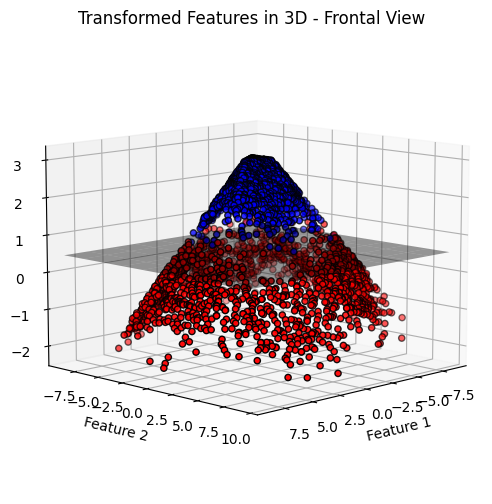

In [263]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# Get activations for training data
def get_activations(data, weights, biases):
    activations = fwdPropagate(data, weights, biases)
    return activations[2]  # Getting activations after the second hidden layer (a2)

transformed_features = get_activations(tr_data, W, B)

# Plotting the transformed features in 3D with a frontal view
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

x = tr_data[:, 0]
y = tr_data[:, 1]
z = transformed_features[:, 2]

scatter = ax.scatter(x, y, z, c=tr_targets, cmap=ListedColormap(['blue', 'red']),  edgecolor = 'k')
ax.set_xlim(min(x), max(x))
ax.set_ylim()
ax.set_zlim()
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('Transformed Features in 3D - Frontal View')
ax.grid()
# Set the viewing angle to a frontal view
ax.view_init(elev=10, azim=45)

xx, yy = np.meshgrid(np.linspace(np.min(x), np.max(x), 10), np.linspace(np.min(y), np.max(y), 10))
zz = np.full_like(xx, 0.5)
ax.plot_surface(xx, yy, zz, alpha= 0.4, color='black')
plt.show()


#visualisation of seperable data in transformed space